In [1]:
import pandas as pd, numpy as np, scipy
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import matplotlib.cbook
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import numpy as np

In [2]:
import warnings
import matplotlib.cbook

plt.rcParams.update({'figure.max_open_warning': 0})
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
df = pd.read_csv("../data/Repayments.csv", delimiter=';')
static = pd.read_csv("../data/Static.csv", delimiter=';')

In [4]:
pivot_scheduled = df.pivot_table(index=['CONTRACT_ID'], columns=['PERIOD_ID'], values=['REPAYMENT_SCHEDULED']).replace(np.nan, 0)
pivot_actual = df.pivot_table(index=['CONTRACT_ID'], columns=['PERIOD_ID'], values=['REPAYMENT_ACTUAL']).replace(np.nan, 0)

2.6457513110645907


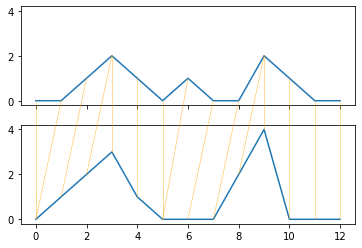

In [5]:
s1 = np.array([0., 0, 1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 0])
s2 = np.array([0., 1, 2, 3, 1, 0, 0, 0, 2, 4, 0, 0, 0])
path = dtw.warping_path(s1, s2)
dtwvis.plot_warping(s1, s2, path)
distance = dtw.distance(s1, s2)
print(distance)

In [6]:
distance = dtw.distance(s1, s2)
print(distance)

2.6457513110645907


(<Figure size 720x720 with 4 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f29d10eb518>])

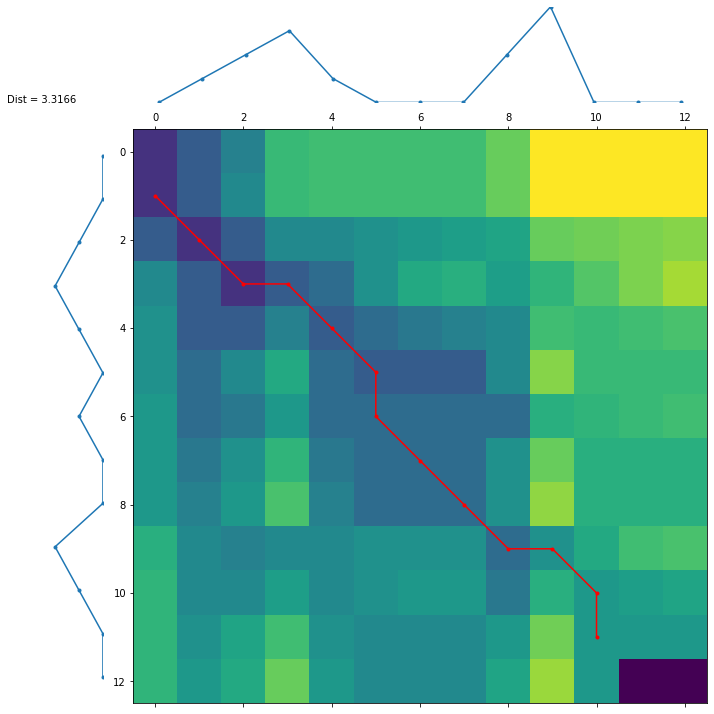

In [7]:
d, paths = dtw.warping_paths(s1, s2, window=25, psi=2)
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(s1, s2, paths, best_path)

In [8]:
pivot_scheduled = pivot_scheduled.loc[:,'REPAYMENT_SCHEDULED'].loc[:,:20]
pivot_actual = pivot_actual.loc[:,'REPAYMENT_ACTUAL']
pivot_scheduled[pivot_actual == 0] = 0

In [9]:
pivot_actual.shape == pivot_scheduled.shape

True

In [10]:
pivot = (pivot_actual - pivot_scheduled) / np.array([static.set_index('CONTRACT_ID').loc[pivot_scheduled.index.values]['CONTRACT_SUM'] for i in range(20)]).T

In [108]:
pivot

PERIOD_ID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
CONTRACT_ID,,,,,,,,,,,,,,,,,,,,
17228104,0.000000,0.000000,0.000000,0.000000,0.129032,0.209699,0.000548,0.055248,0.043955,-0.004503,0.006460,0.000000,0.041332,0.046350,0.036534,0.000000,0.010424,0.000000,0.000455,-0.001307
17237409,0.000429,0.001171,0.001171,0.001171,0.001171,0.001171,0.001171,0.001171,0.001171,0.001171,0.001171,0.321287,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
17276280,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.862546,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
17282809,0.000000,0.000000,0.000000,0.000000,0.000000,0.900014,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
17283247,0.000138,-0.000138,0.000000,0.000132,0.000132,-0.000264,0.000000,0.000000,0.000000,0.000000,0.000345,-0.000345,0.000000,0.000000,0.000000,0.000000,0.000000,0.001782,0.000000,0.000245
17294333,0.004556,0.004549,0.000305,-0.009244,-0.009050,0.000312,0.000298,-0.000797,0.000000,0.000000,0.000000,0.000062,0.000083,0.000062,-0.000208,0.000104,0.000125,-0.000229,0.000062,0.000042
17306398,0.000000,0.000000,0.000000,0.447028,-0.016273,-0.016355,-0.012135,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.013206,0.000000,0.000000,0.000000,0.000000,0.000000
17320168,0.005209,0.005204,-0.005735,0.000829,0.005438,0.003014,0.006953,-0.000069,0.000000,-0.000137,-0.000172,-0.003528,-0.001984,-0.000234,-0.000257,0.001938,-0.000229,-0.000217,0.005352,-0.006782
17324117,0.003411,0.005910,0.006283,0.008907,0.008454,0.005437,0.000203,0.003332,-0.001679,-0.006080,-0.010730,-0.010566,-0.001902,0.003030,-0.007005,-0.001450,-0.001548,-0.001640,-0.002092,-0.000105


In [111]:
def print_contract(contract_id):
    pivot_scheduled
    plt.figure()
    pivot.loc[contract_id].T.plot(figsize=(12, 12), linewidth = 5)
    title = 'contract: ' + str(contract_id) + '   grace: ' + str(static[static['CONTRACT_ID'] == pivot_actual.loc[contract_id].name]['GRACE_PERIOD'].values[0]) + \
    '   rate_change:' + str(static[static['CONTRACT_ID'] == pivot_actual.loc[contract_id].name]['RATE_CHANGE_AFTER_GRACE'].values[0])

    plt.title(title)

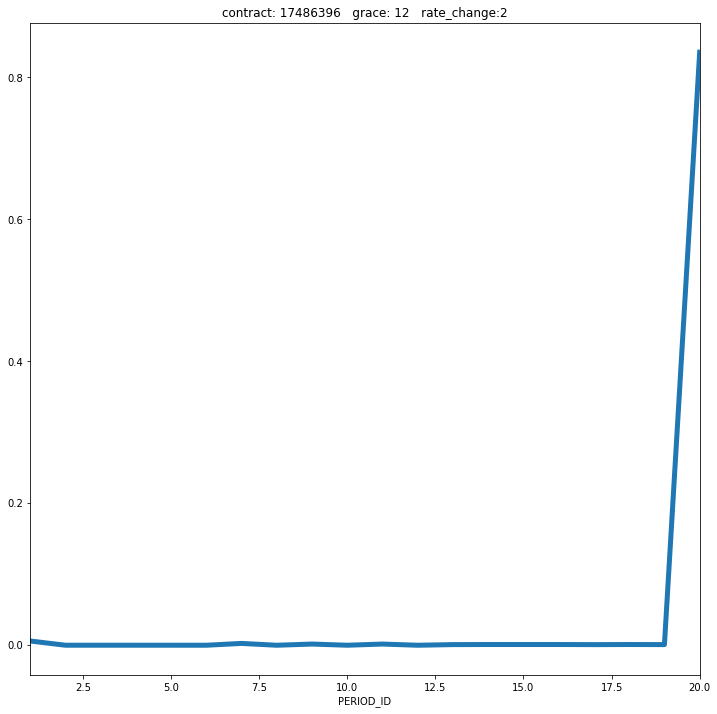

In [112]:
print_contract(17486396)

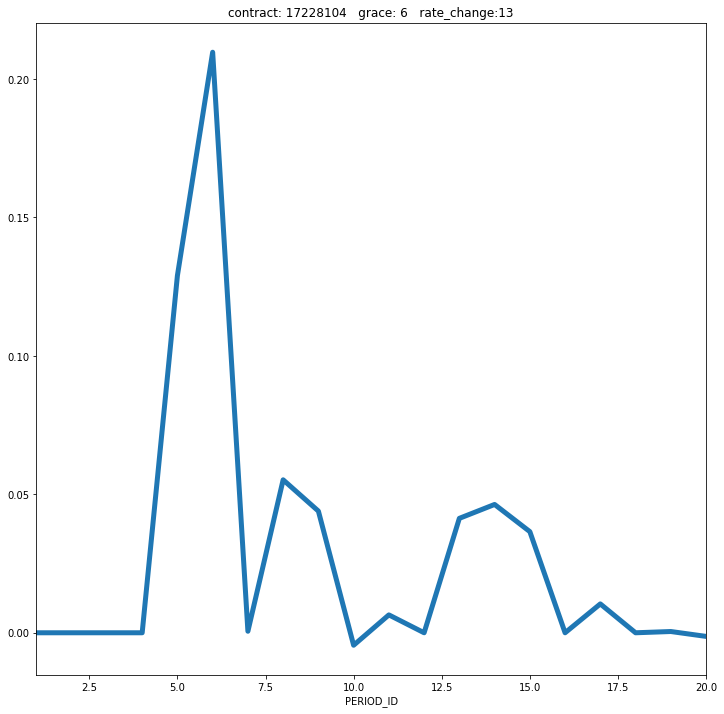

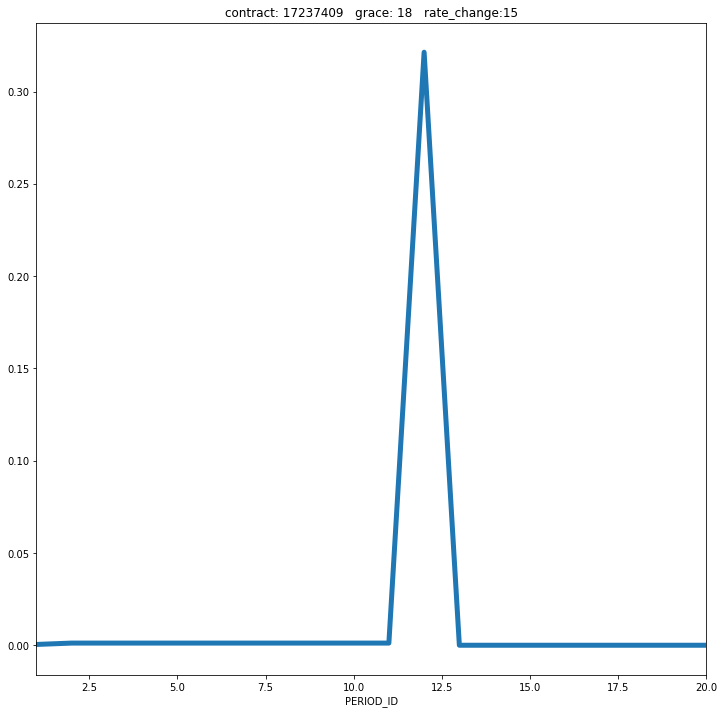

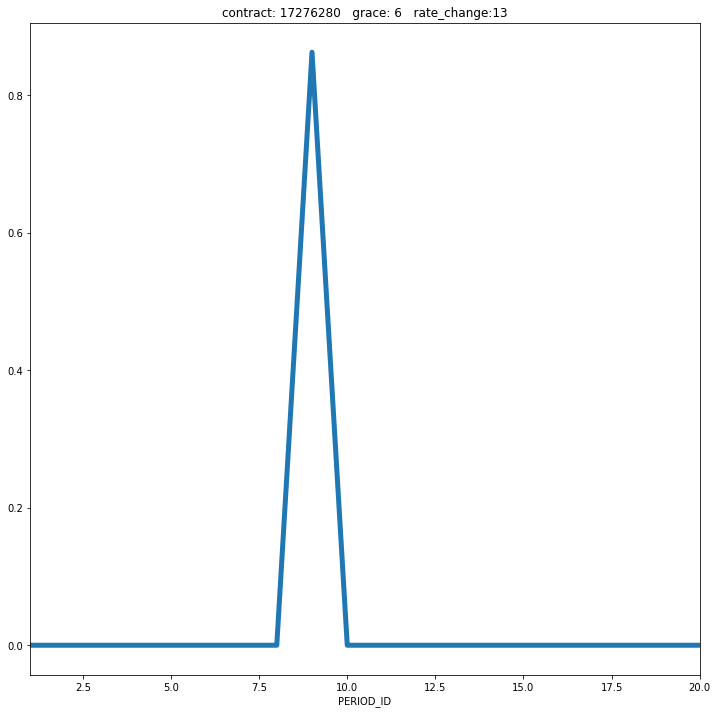

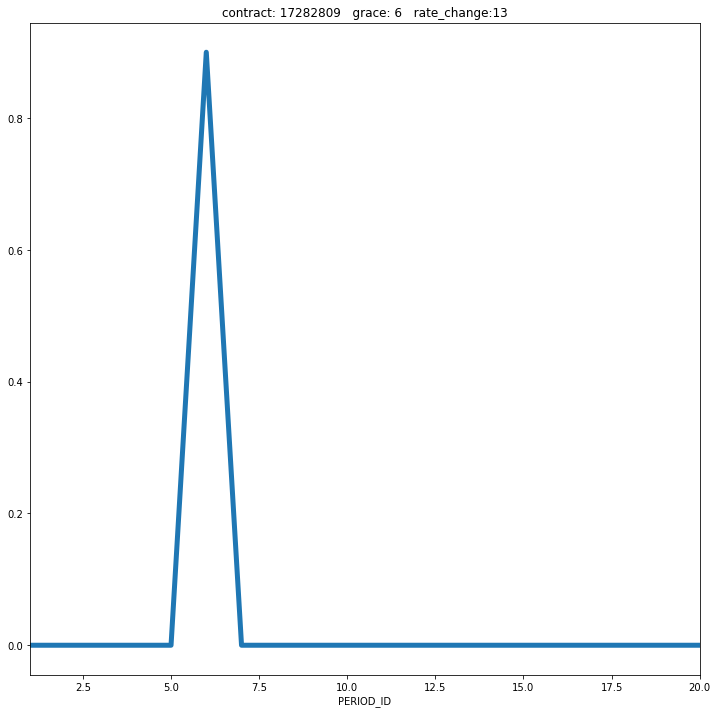

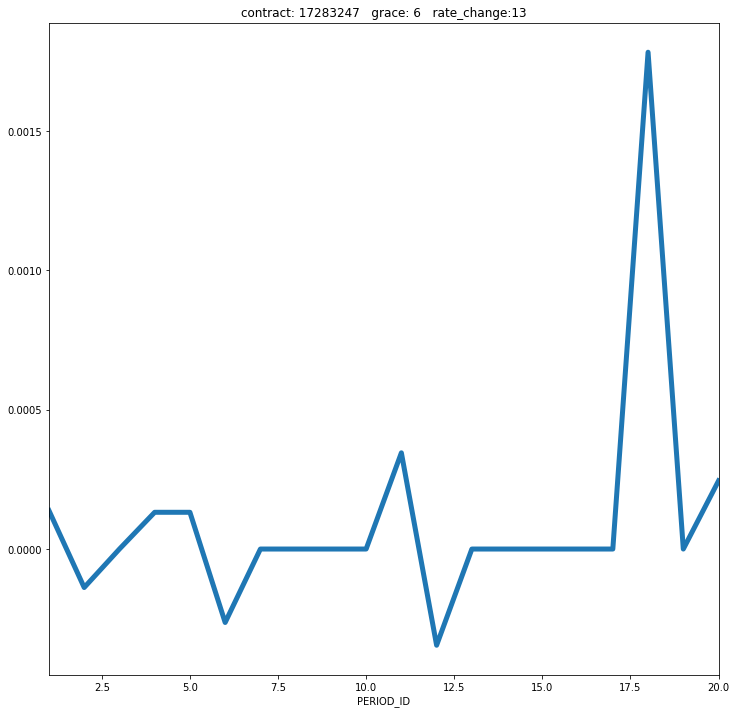

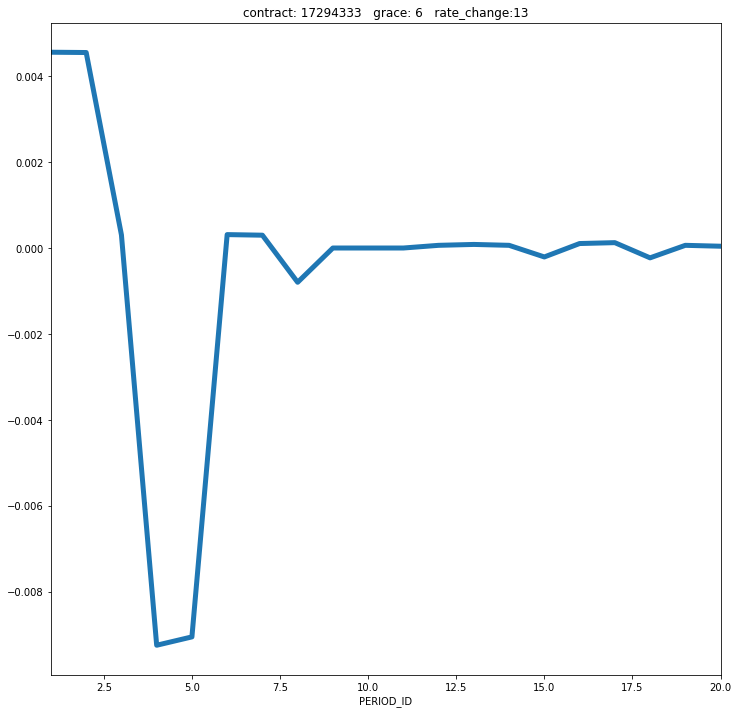

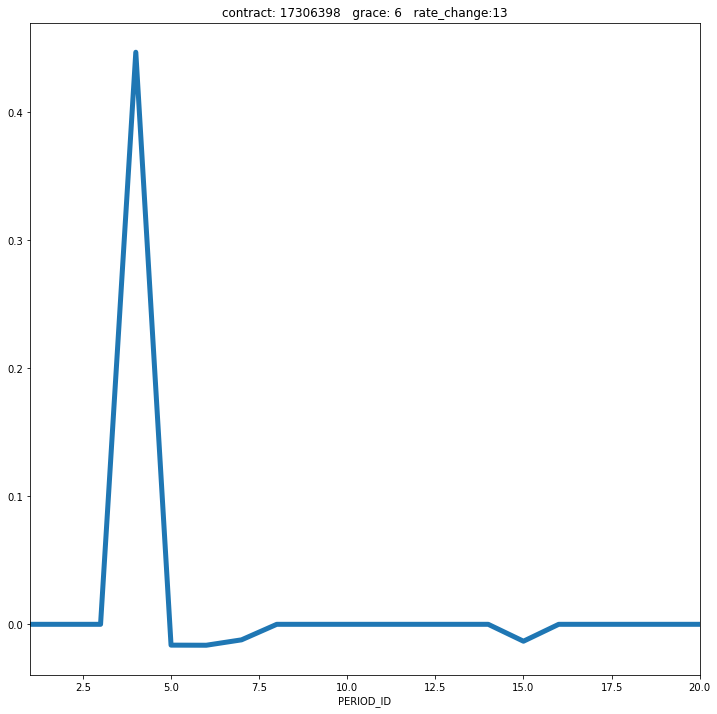

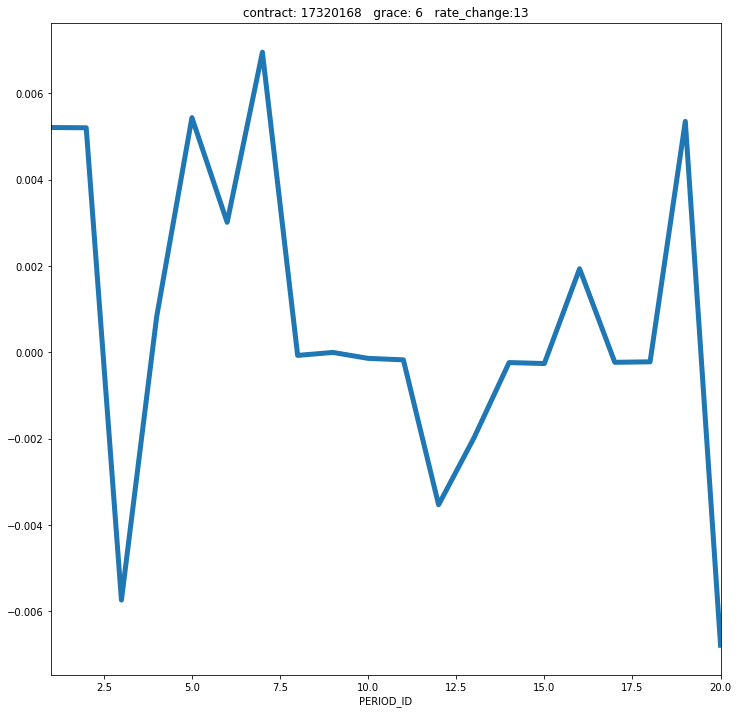

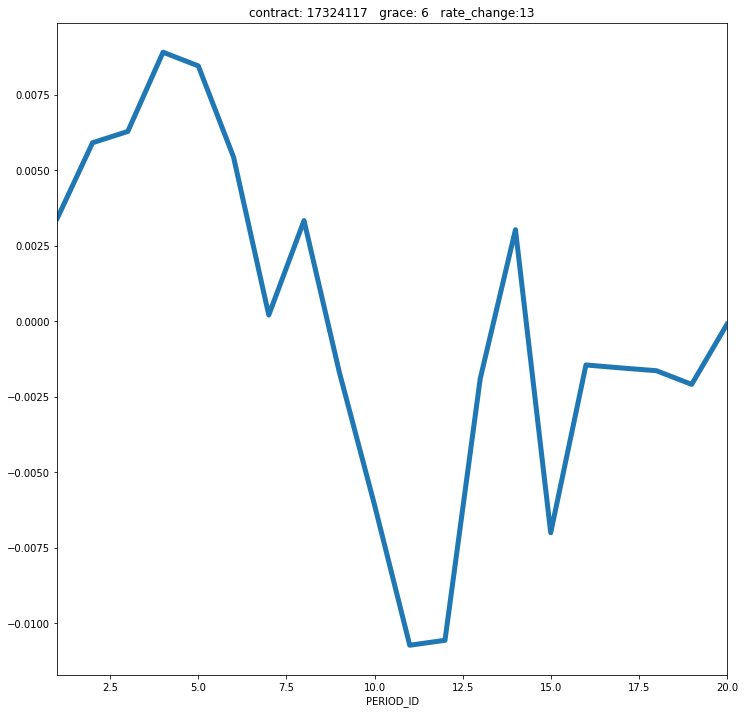

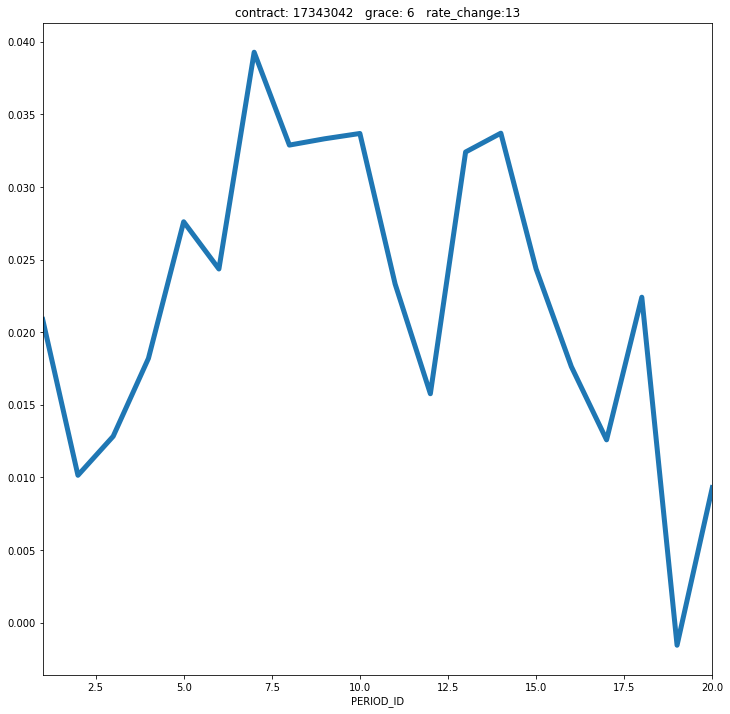

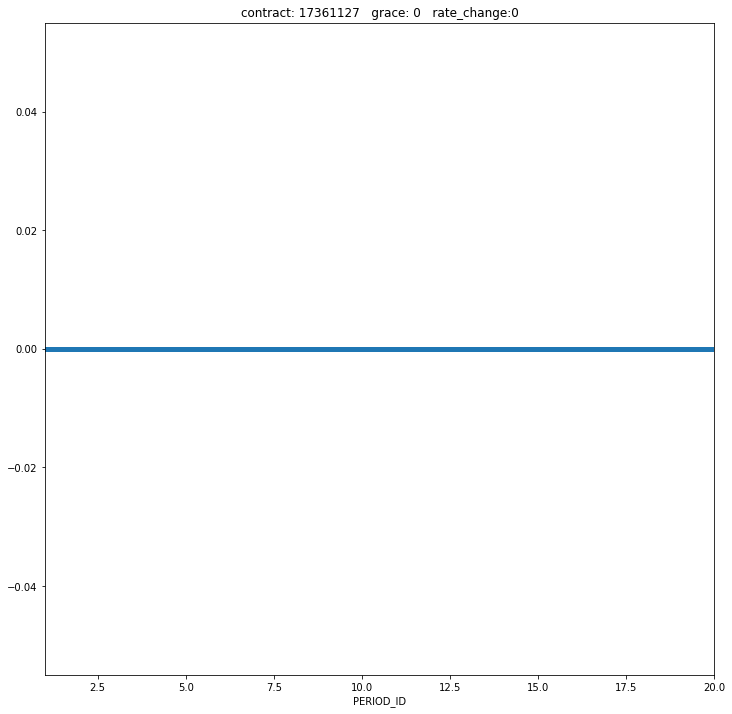

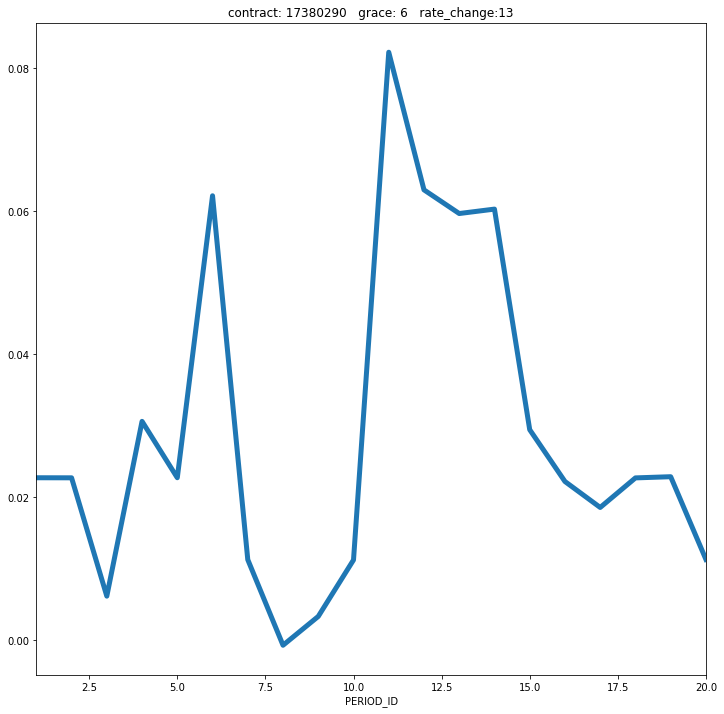

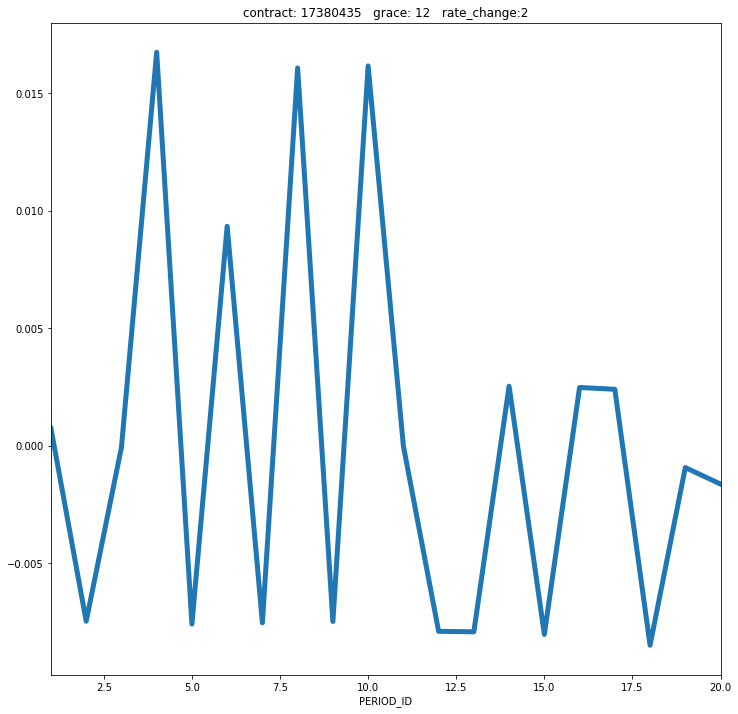

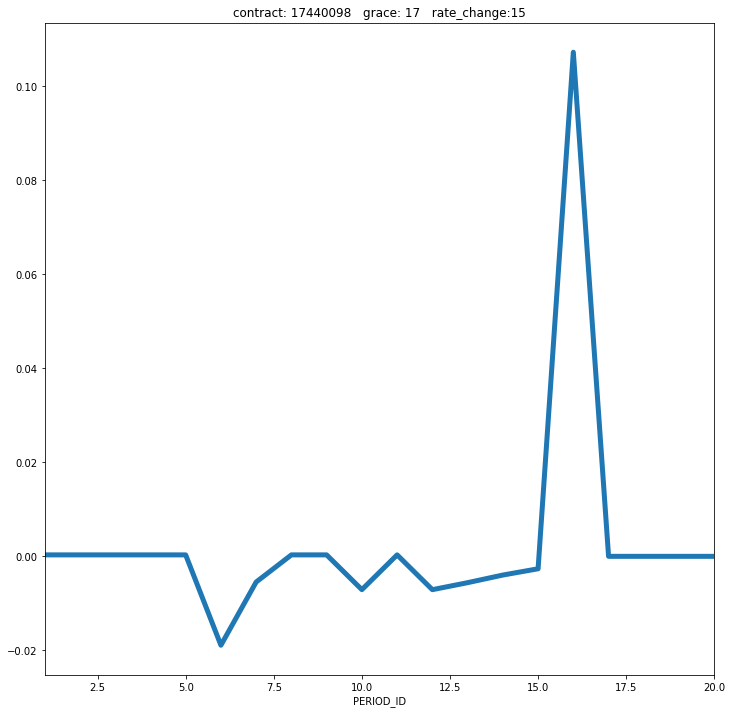

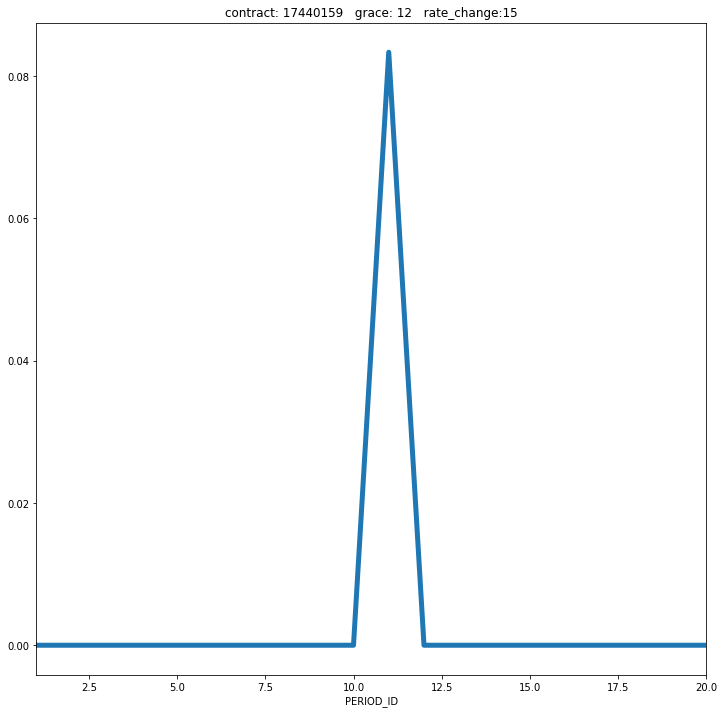

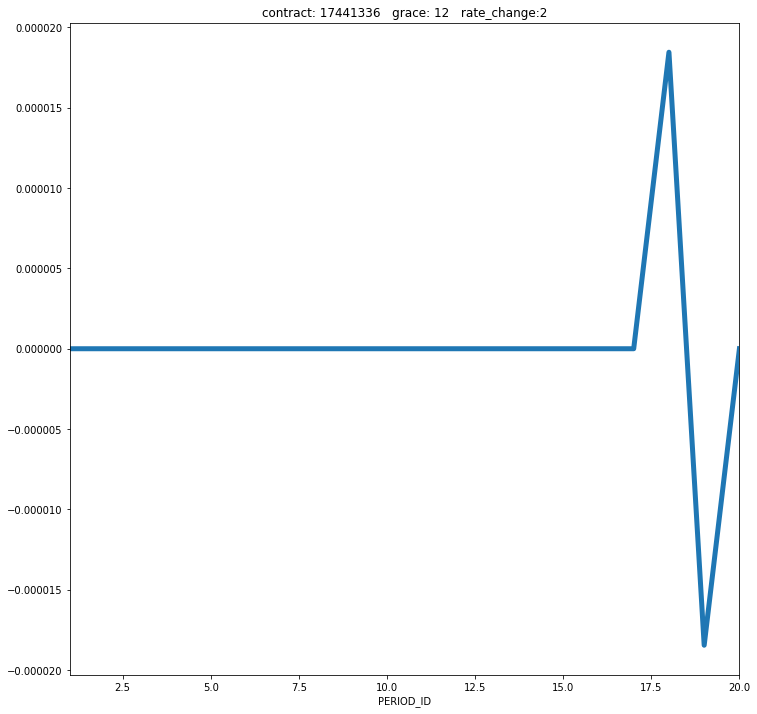

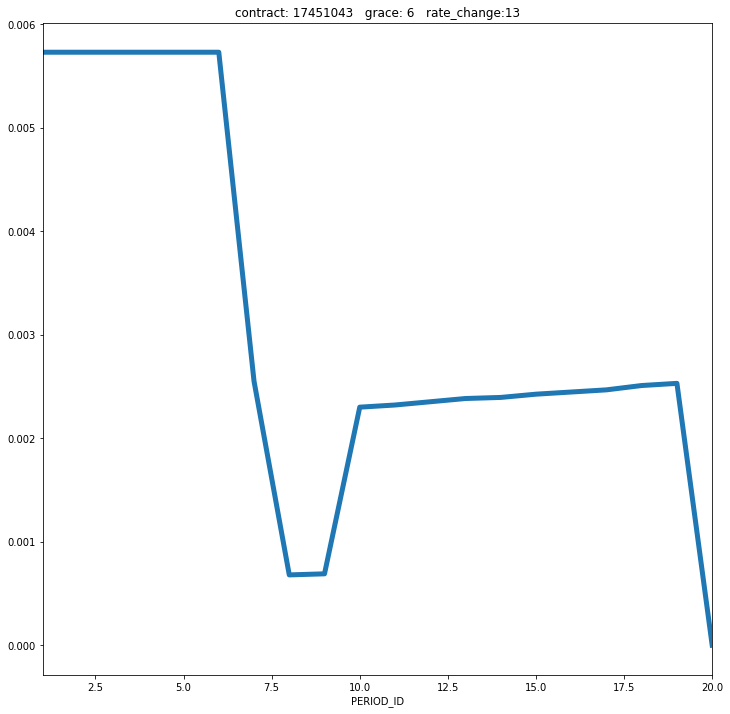

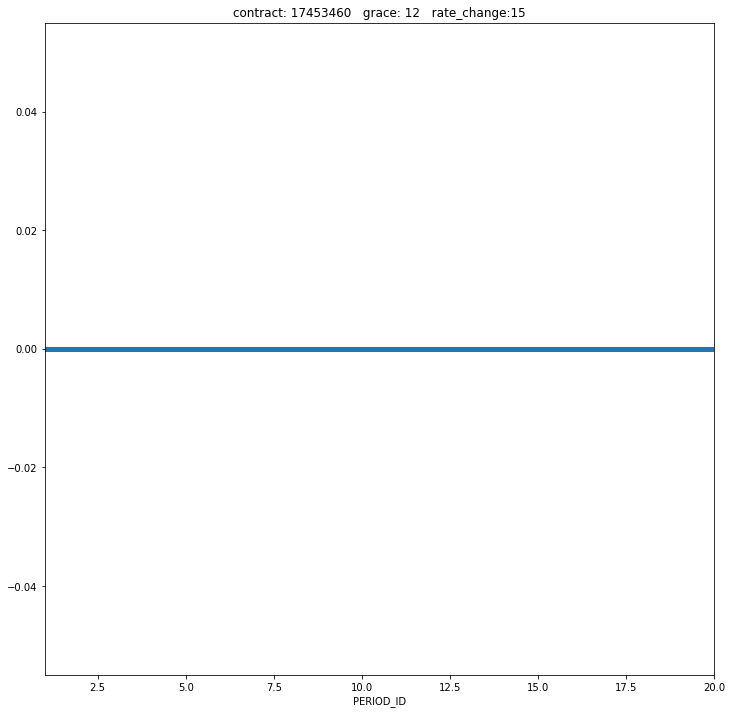

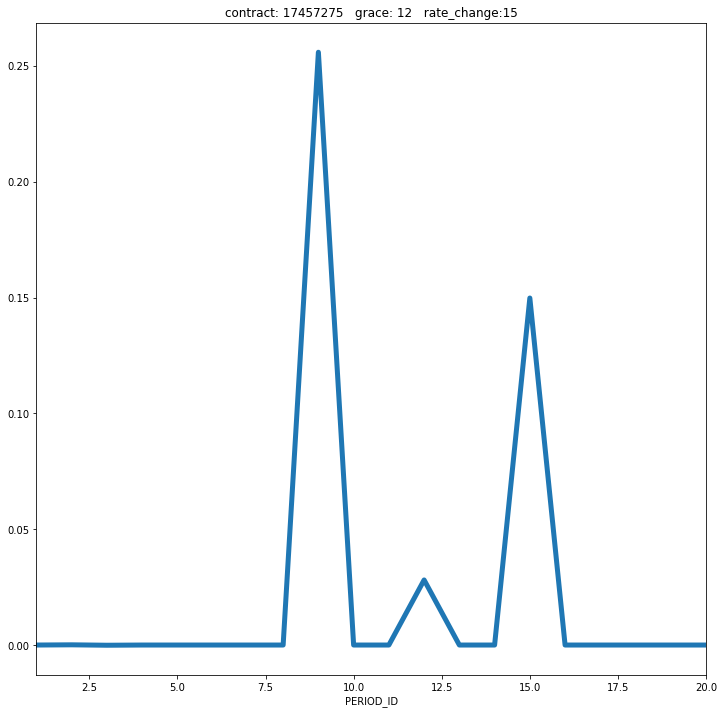

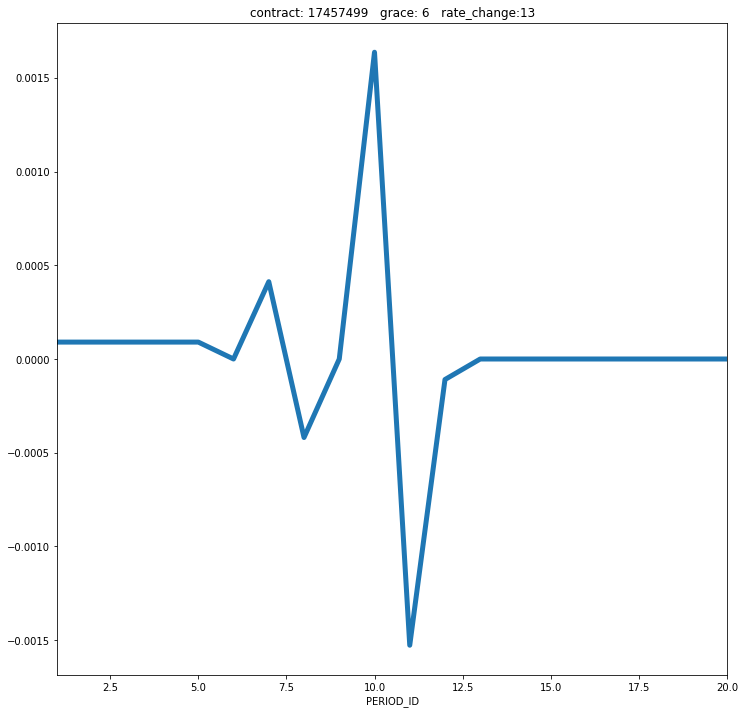

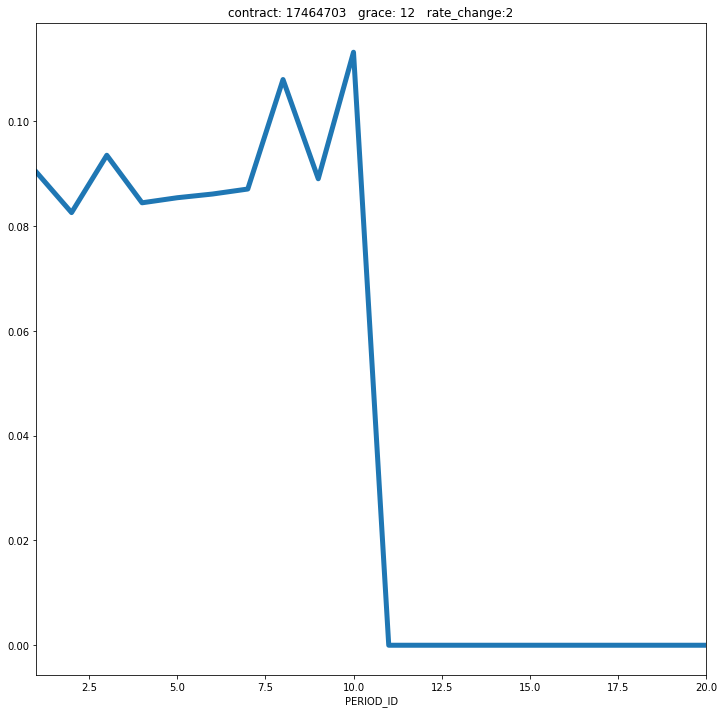

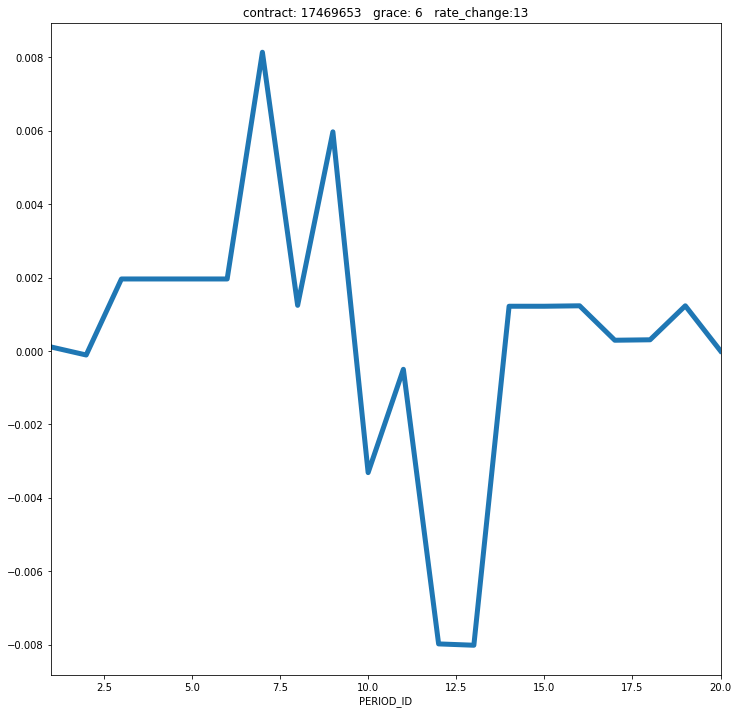

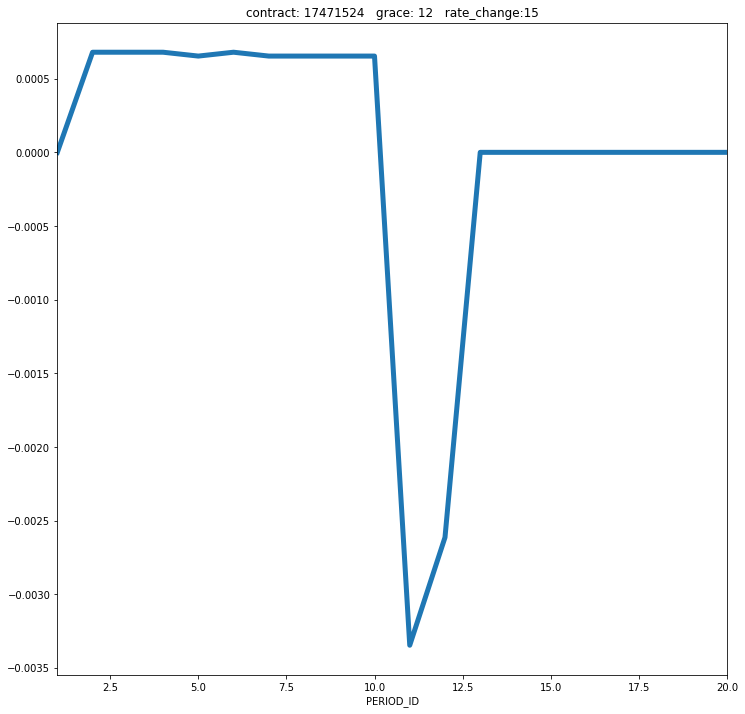

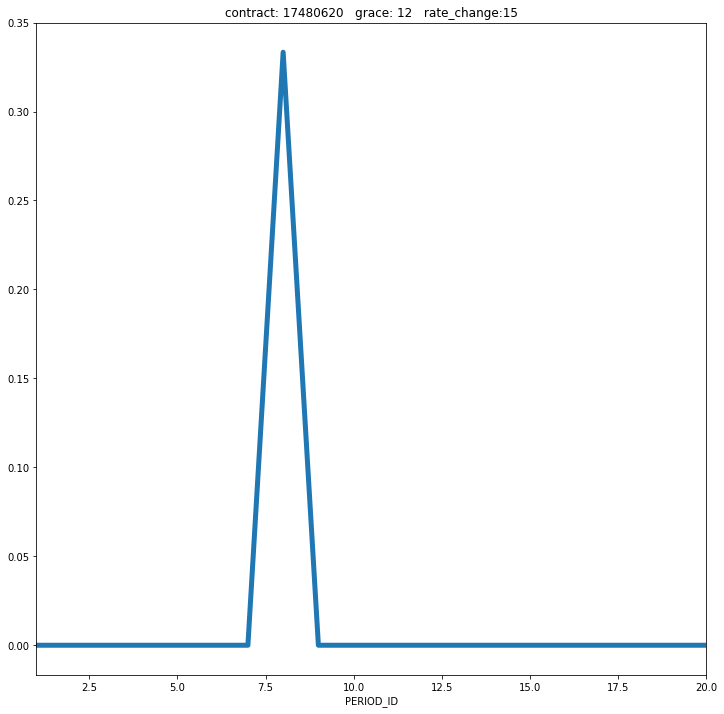

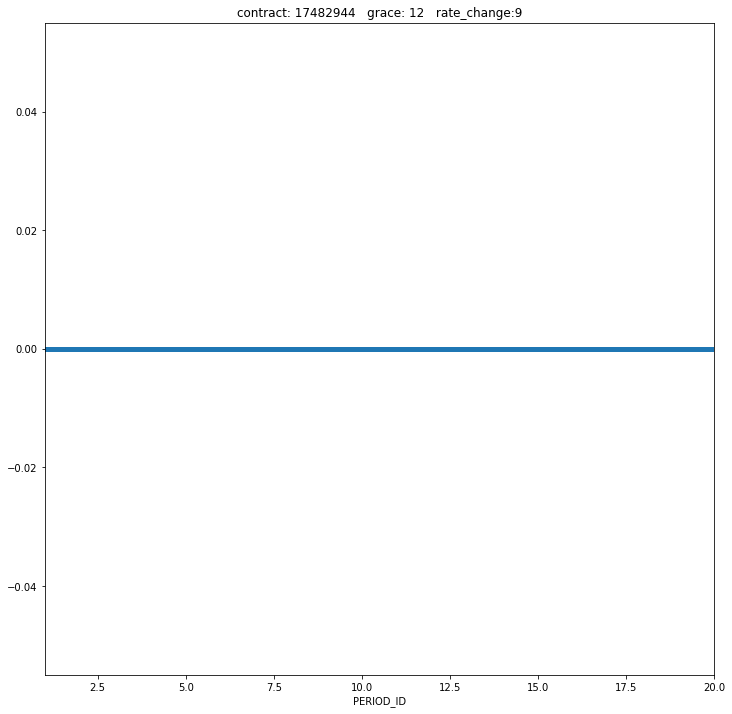

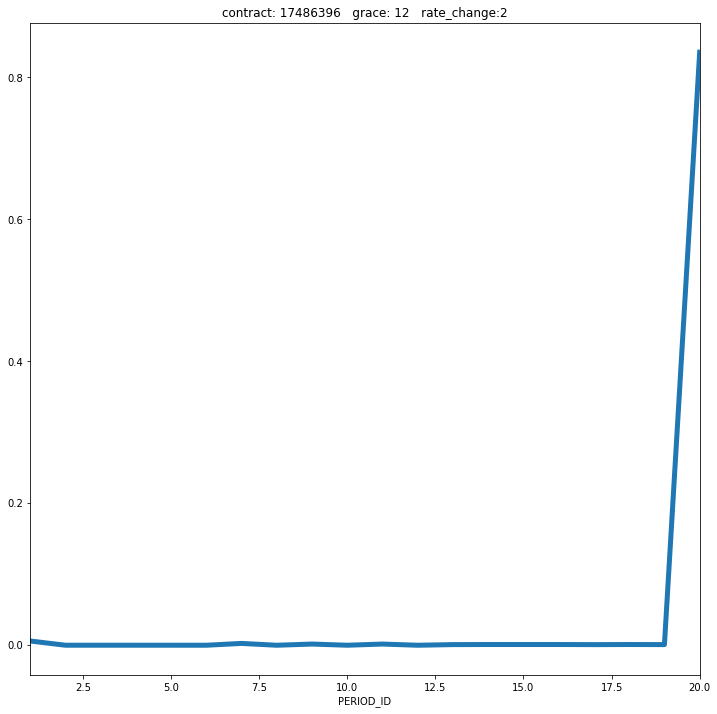

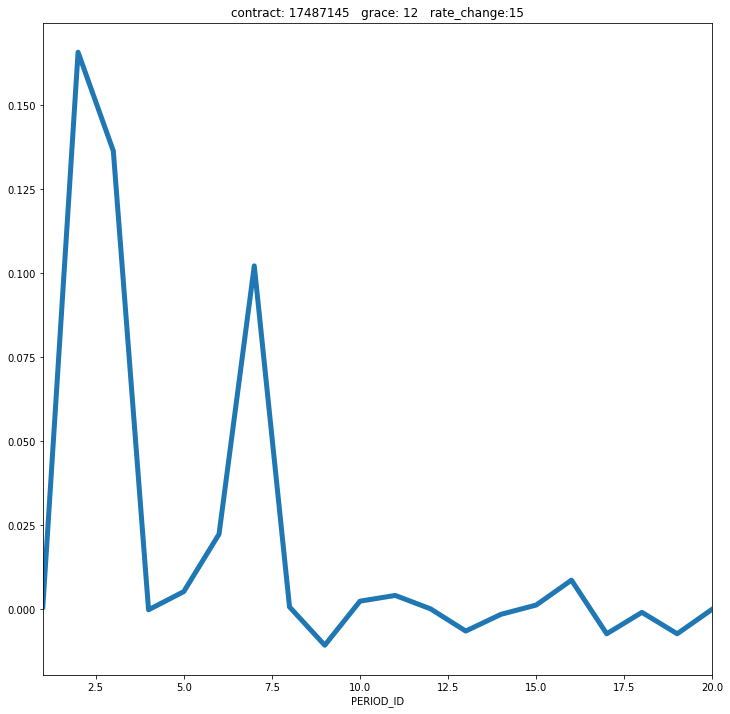

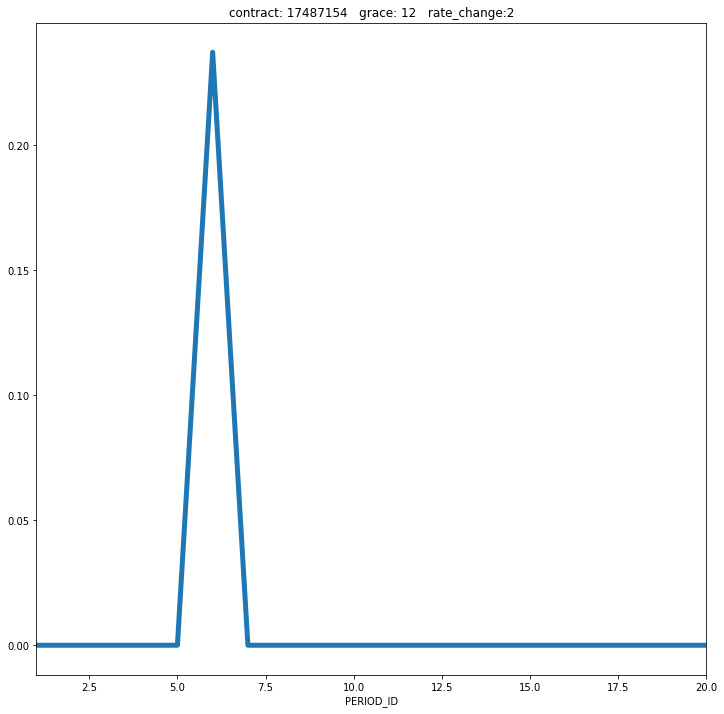

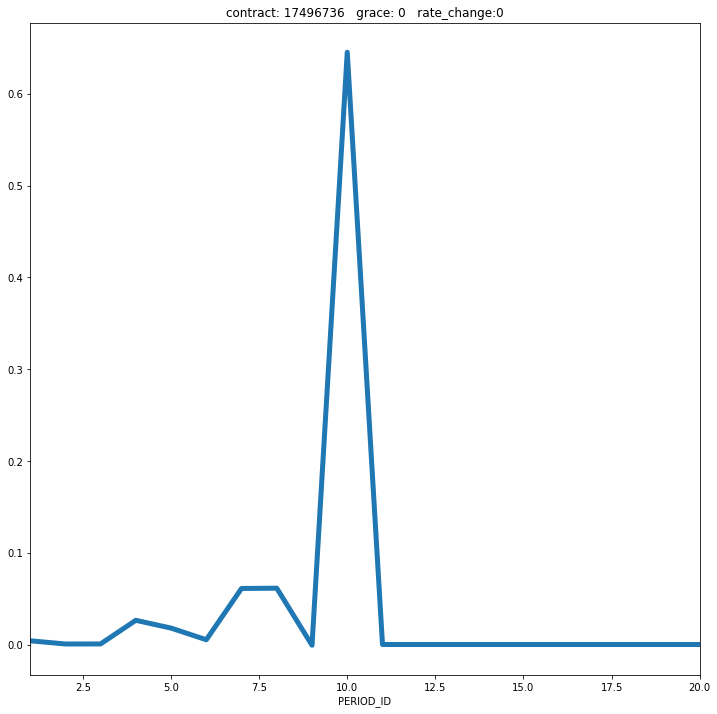

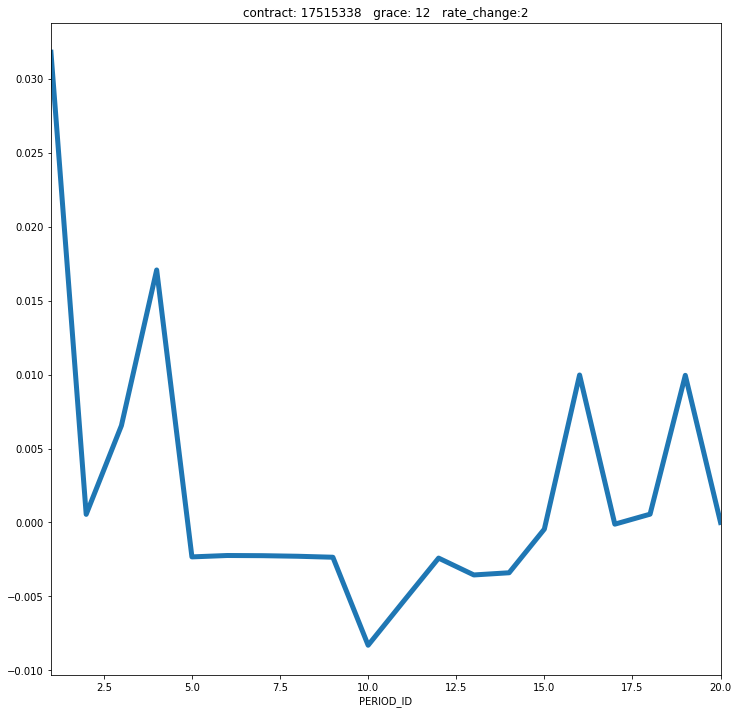

In [12]:
for i in range(30):
    print_contract(pivot.index[i])

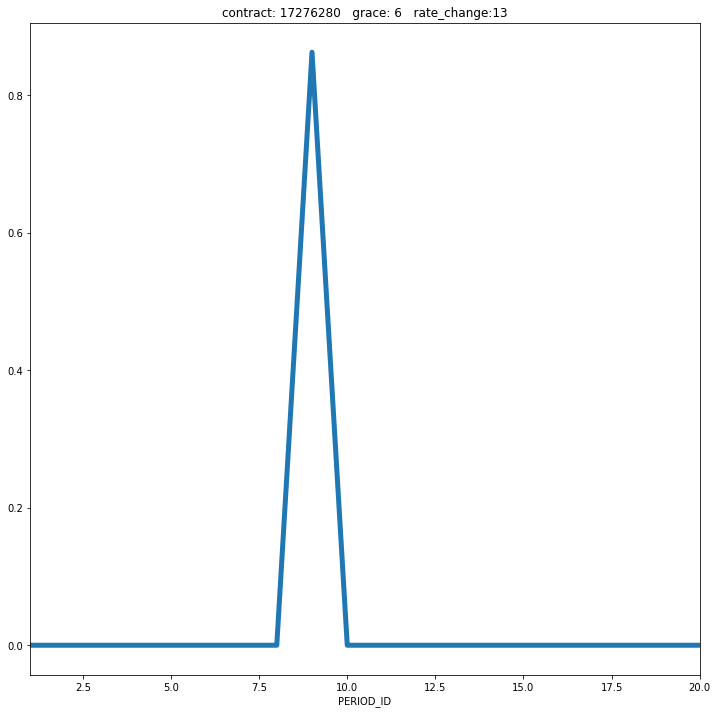

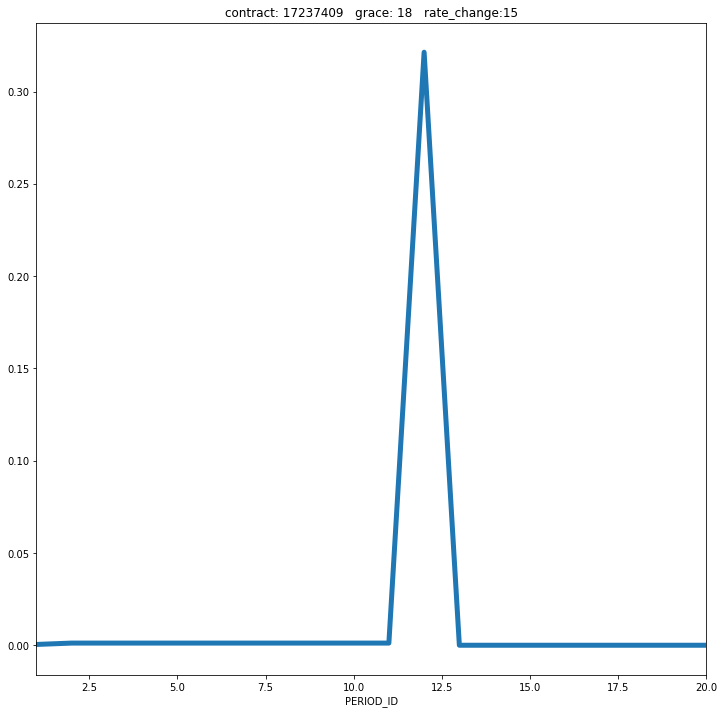

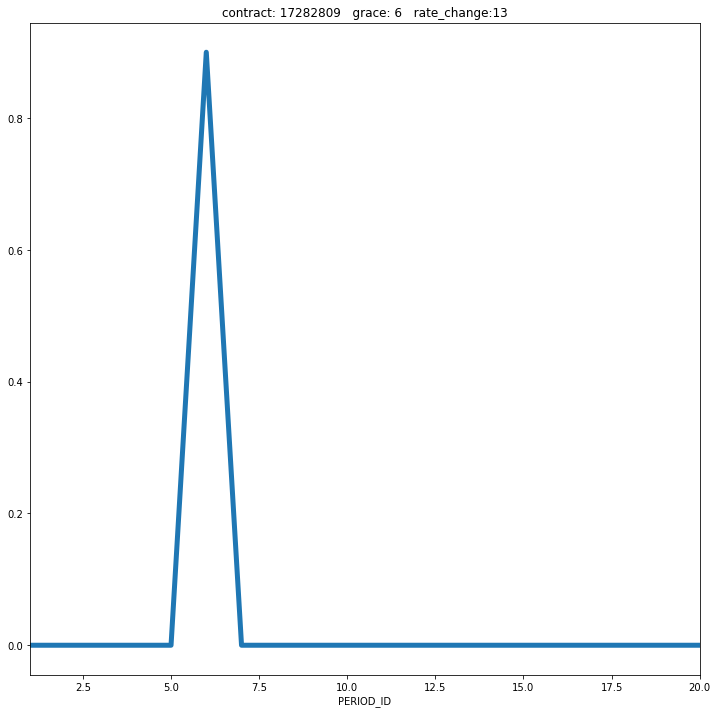

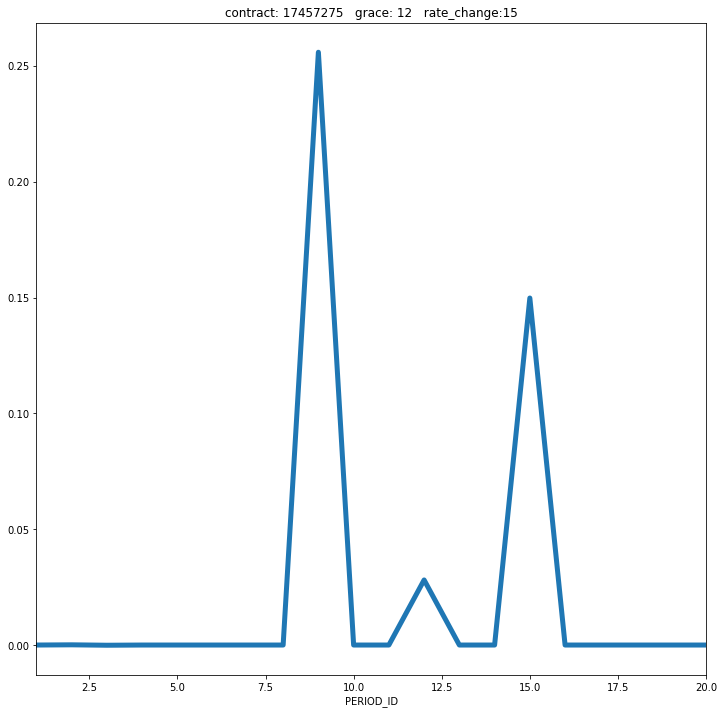

In [13]:
for i in ([17276280,17237409,17282809,17457275]):
    print_contract(i)


In [14]:
pivot.iloc[:30].values

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.29032258e-01,  2.09698503e-01,
         5.48176260e-04,  5.52477335e-02,  4.39553026e-02,
        -4.50347881e-03,  6.46004638e-03,  0.00000000e+00,
         4.13324900e-02,  4.63504111e-02,  3.65338393e-02,
         0.00000000e+00,  1.04237824e-02,  0.00000000e+00,
         4.55407970e-04, -1.30718954e-03],
       [ 4.29293422e-04,  1.17080024e-03,  1.17080024e-03,
         1.17080024e-03,  1.17080024e-03,  1.17080024e-03,
         1.17080024e-03,  1.17080024e-03,  1.17080024e-03,
         1.17080024e-03,  1.17080024e-03,  3.21287100e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  8.62546101e-01,
         0.00000000e+00,  0.0

In [15]:
s1 = pivot.loc[17276280].values
s2 = pivot.loc[17457275].values

0.6255136701609512


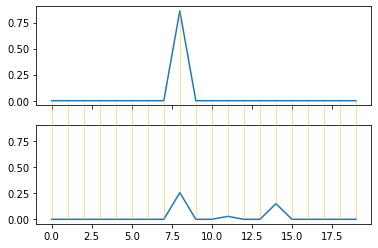

In [16]:
path = dtw.warping_path(s1, s2)
dtwvis.plot_warping(s1, s2, path)
distance = dtw.distance(s1, s2)
print(distance)

In [73]:
series = pivot.iloc[:30].values

In [103]:
ds = dtw.distance_matrix(series)

In [104]:
ds

array([[           inf, 1.97893434e-01, 6.73207273e-01, 7.09601298e-01,
        2.62609712e-01, 2.57355236e-01, 2.90016392e-01, 2.52577595e-01,
        2.49222464e-01, 2.07843557e-01, 2.66404783e-01, 1.79106380e-01,
        2.33981644e-01, 1.47849157e-01, 1.68531219e-01, 2.66364953e-01,
        2.54918383e-01, 2.66404783e-01, 1.82014391e-01, 2.62920013e-01,
        2.40968876e-01, 2.50139788e-01, 2.64978497e-01, 2.05629807e-01,
        2.66404783e-01, 8.75265013e-01, 1.21669083e-01, 1.51033646e-01,
        4.74893990e-01, 2.21270055e-01],
       [           inf,            inf, 5.41271835e-01, 5.78739243e-01,
        3.19516302e-01, 3.17210500e-01, 1.29145703e-01, 3.14653665e-01,
        3.13258949e-01, 3.00087791e-01, 3.21308718e-01, 2.78291999e-01,
        3.06407000e-01, 2.15481766e-01, 2.37975694e-01, 3.21291987e-01,
        3.16034207e-01, 3.21308718e-01, 1.65884005e-01, 3.19660360e-01,
        3.57188210e-01, 3.13451070e-01, 3.20642237e-01, 1.26096697e-02,
        3.21308718e-01,

In [96]:
from dtaidistance import clustering
# Custom Hierarchical clustering
model1 = clustering.Hierarchical(dtw.distance_matrix, {})
cluster_idx = model1.fit(series)

model2 = clustering.HierarchicalTree(model1)
cluster_idx = model2.fit(series)


 97%|█████████▋| 29/30 [00:00<00:00, 24375.71it/s]


In [95]:
model3 = clustering.LinkageTree(dtw.distance_matrix, {})
cluster_idx = model3.fit(series)

In [99]:
model2.plot("a.png")

ValueError: list.remove(x): x not in list

ValueError: list.remove(x): x not in list

<Figure size 432x288 with 2 Axes>

In [106]:
from dtaidistance import clustering
# Custom Hierarchical clustering
model1 = clustering.Hierarchical(dtw.distance_matrix, {})
cluster_idx = model1.fit(series)
# Augment Hierarchical object to keep track of the full tree
model2 = clustering.HierarchicalTree(model1)
cluster_idx = model2.fit(series)
# SciPy linkage clustering

 97%|█████████▋| 29/30 [00:00<00:00, 23572.64it/s]


In [ ]:

model3 = clustering.LinkageTree(dtw.distance_matrix, {})
cluster_idx = model3.fit(series)

In [107]:
model2.plot("myplot.png")

ValueError: list.remove(x): x not in list

ValueError: list.remove(x): x not in list

<Figure size 432x288 with 2 Axes>

In [ ]:
# Euclidean k-means
ks = KShape(n_clusters=3, verbose=True, random_state=seed)
y_pred = ks.fit_predict(X_train)

plt.figure()
for yi in range(3):
    plt.subplot(3, 1, 1 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(ks.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.title("Cluster %d" % (yi + 1))

plt.tight_layout()
plt.show()